## Observations and Insights 


It can be noticed that Ramican is most likely the most efficient drug of those that were examined. The reason for this is that it has thbe least final tumor volume and also the lowest median value when looking into the box plot figures.However, more analysis would be needed to calculate the difference in tumor volumes at the start of the study to the end of the study. This would allow us to better see the effectiveness of each drug regimen. The Capomulin drug performs similarly to Ramicane. 
There is a positive correlation between the mouse's weight and the tumor volume. The r-value is 0.71 which implies the positive correlation. This is further backed up by the linear regression.Another conclusion that can be made, is that a mouse treated on the Capomulin drug regimen saw a decrease in its tumor volume over the full course of the study. Therefore, it can be said that Capomulin is effective as a treatment.


In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [20]:
# Checking the number of mice.
len(mouse_study["Mouse ID"].unique())

249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_id = duplicate_mice["Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = mouse_study[mouse_study["Mouse ID"].isin(duplicate_mouse_id)]
dup_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study[~ mouse_study["Mouse ID"].isin(duplicate_mouse_id)]
mouse_study_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study_clean["Mouse ID"].unique())

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_group = mouse_study_clean.groupby("Drug Regimen")
mean = drug_group["Tumor Volume (mm3)"].mean()
median = drug_group["Tumor Volume (mm3)"].median()
var = drug_group["Tumor Volume (mm3)"].var()
std = drug_group["Tumor Volume (mm3)"].std()
sem = drug_group["Tumor Volume (mm3)"].sem()

drug_tumor_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Standard Deviation": std, "SEM": sem})
drug_tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_tumor_agg = mouse_study_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
drug_tumor_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

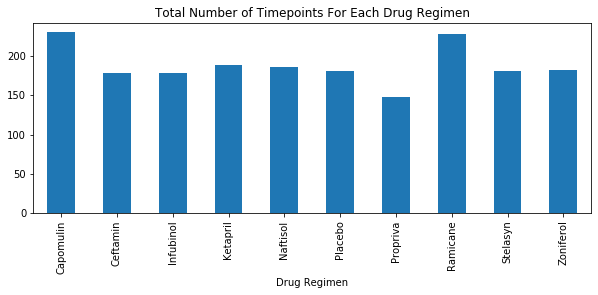

<Figure size 432x288 with 0 Axes>

In [27]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_drug = mouse_study_clean.groupby("Drug Regimen")["Timepoint"].count()
timepoint_drug.plot(kind="bar", figsize=(10,3.5))
plt.title("Total Number of Timepoints For Each Drug Regimen")
plt.show()
plt.tight_layout()

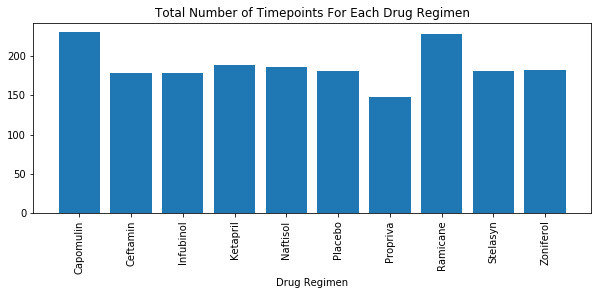

<Figure size 432x288 with 0 Axes>

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen = mouse_study_clean["Drug Regimen"].sort_values().unique()
timepoint_count = mouse_study_clean.groupby("Drug Regimen")["Timepoint"].count()

x_axis = np.arange(len(drug_regimen))
tick_locations = [x for x in x_axis]

plt.figure(figsize=(10,3.5))
plt.title("Total Number of Timepoints For Each Drug Regimen")
plt.xlabel("Drug Regimen")

plt.bar(x_axis, timepoint_count, alpha=1, align="center")
plt.xticks(tick_locations, drug_regimen, rotation="vertical")

plt.show()
plt.tight_layout()

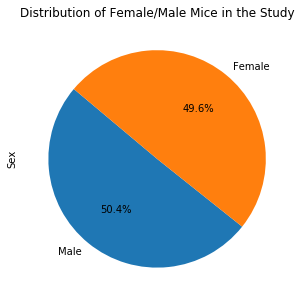

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_metadata_clean = mouse_metadata.loc[~mouse_metadata["Mouse ID"].isin(duplicate_mouse_id)]
distribution = mouse_metadata_clean["Sex"].value_counts()

distribution.plot(kind="pie", figsize=(5,5), autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Female/Male Mice in the Study")
plt.show()

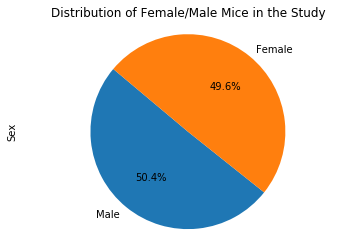

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mouse_metadata_clean["Sex"].unique()
plt.pie(distribution, labels=labels ,autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.title("Distribution of Female/Male Mice in the Study")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = mouse_study_clean.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor = pd.merge(max_tp, mouse_study_clean, how="left", on=["Mouse ID", "Timepoint"])
final_tumor.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments: 
    final_tumor_treatment = final_tumor.loc[final_tumor["Drug Regimen"] == treatment]
    
    # add subset 
    final_tumor_vol.append(final_tumor_treatment["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
for index, treatment in enumerate(final_tumor_vol):
    treatment_name = treatments[index]
    
    quartiles = treatment.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of {treatment_name} is: {round(lowerq,2)}.")
    print(f"The upper quartile of {treatment_name} is: {round(upperq,2)}.")
    print(f"The interquartile range of {treatment_name} is: {round(iqr,2)}.")
    print(f"The the median of {treatment_name} is: {round(quartiles[0.5],2)}.")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {round(lower_bound,2)} could be outliers for {treatment_name}.")
    print(f"Values above {round(upper_bound,2)} could be outliers for {treatment_name}.")
    outliers = (final_tumor.loc[(final_tumor["Drug Regimen"] == treatment_name) & ((final_tumor["Tumor Volume (mm3)"] < lower_bound) | (final_tumor["Tumor Volume (mm3)"] > upper_bound))])
    outliers_no = len(outliers)
    print(f"The number of outliers for {treatment_name} is: {outliers_no}.")
    if outliers_no > 0:
        outlier_list = outliers["Mouse ID"].to_numpy()
        print(f"The outliers are: {outlier_list}.")
    print("")
    

The lower quartile of Capomulin is: 32.38.
The upper quartile of Capomulin is: 40.16.
The interquartile range of Capomulin is: 7.78.
The the median of Capomulin is: 38.13.
Values below 20.7 could be outliers for Capomulin.
Values above 51.83 could be outliers for Capomulin.
The number of outliers for Capomulin is: 0.

The lower quartile of Ramicane is: 31.56.
The upper quartile of Ramicane is: 40.66.
The interquartile range of Ramicane is: 9.1.
The the median of Ramicane is: 36.56.
Values below 17.91 could be outliers for Ramicane.
Values above 54.31 could be outliers for Ramicane.
The number of outliers for Ramicane is: 0.

The lower quartile of Infubinol is: 54.05.
The upper quartile of Infubinol is: 65.53.
The interquartile range of Infubinol is: 11.48.
The the median of Infubinol is: 60.17.
Values below 36.83 could be outliers for Infubinol.
Values above 82.74 could be outliers for Infubinol.
The number of outliers for Infubinol is: 1.
The outliers are: ['c326'].

The lower quartil

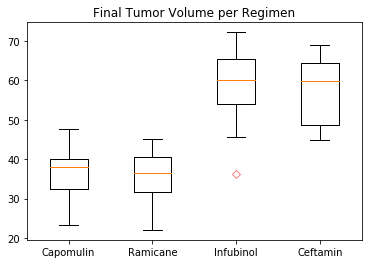

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume per Regimen")
ax1.set_xticklabels(treatments)
bp = ax1.boxplot(final_tumor_vol)
for flier in bp["fliers"]:
    flier.set(marker="D", markeredgecolor="red", alpha=0.5)
plt.show()

## Line and Scatter Plots

(30, 48)

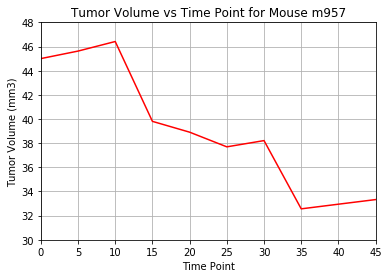

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = "m957"
mouse_df = mouse_study_clean.loc[mouse_study_clean["Mouse ID"] == mouse, ["Timepoint", "Tumor Volume (mm3)"]]
plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"], color="red", label=mouse)
plt.title(f"Tumor Volume vs Time Point for Mouse {mouse}")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.xlim(0,max(mouse_df["Timepoint"]))
plt.ylim(int(min(mouse_df["Tumor Volume (mm3)"]))-2,int(max(mouse_df["Tumor Volume (mm3)"]))+2)

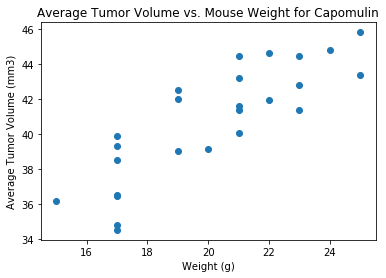

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin", ["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]
av_tumor = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(weight,av_tumor)
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.71.


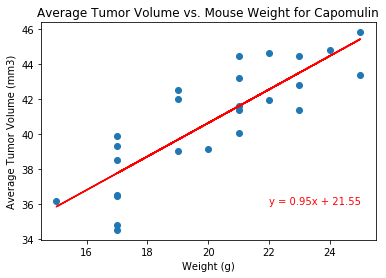

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, rvalue, pvalue, stderr = st.linregress(weight, av_tumor)
fit = slope * weight + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, av_tumor)
plt.plot(weight,fit,"r-")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq,(22,36), fontsize=10, color="red")
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(rvalue**2,2)}.")